Welcome to the KW-Optimization DashboardVs. 0.8
Filter year, limits and status:


Filter Keyword, MaxCPC and Conversion:


Filter Campaign, CTR and Costs:


Button(description='ScatterView', style=ButtonStyle())

Output()

Button(description='PairPlot', style=ButtonStyle())

Output()

Button(description='ViolinPlot1', style=ButtonStyle())

Output()

Button(description='ViolinPlot2', style=ButtonStyle())

Output()

Button(description='ViolinPlot3', style=ButtonStyle())

Output()

Button(description='PieChart', style=ButtonStyle())

Output()

Button(description='Scatter1', style=ButtonStyle())

Output()

Button(description='PerformanceView', style=ButtonStyle())

Output()

Button(description='Boxplot1', style=ButtonStyle())

Output()

Button(description='Boxplot2', style=ButtonStyle())

Output()

Button(description='MultipleTS', style=ButtonStyle())

Output()

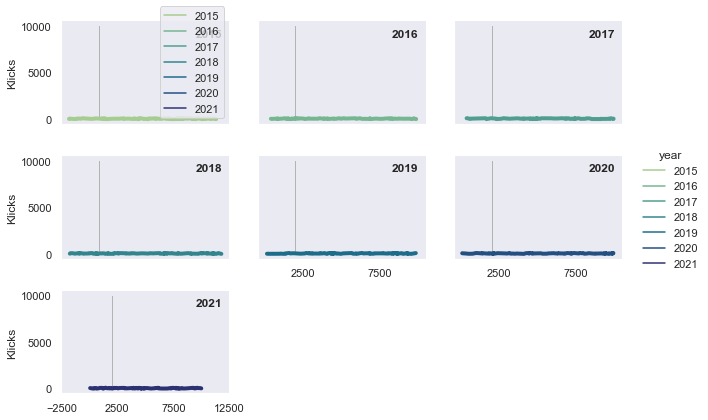

In [13]:
#Easymap - Keyword Optimization Performance Dashboard

#Version 0.90

#o - Imports

import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import numpy as np
import warnings

#p - Warnings
warnings.filterwarnings('ignore')

#q - Welcoming &

print("Welcome to the " + '\033[1m' + "KW-Optimization Dashboard" + "Vs. 0.8")

mytab1 = "easytest8csv.csv"
df_a = pd.read_csv(mytab1)

a=0
ALL = 0

#r

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#s 

output = widgets.Output() 
plot_output = widgets.Output() 
test_output = widgets.Output()
tab_output = widgets.Output()

#t

#t1
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.year), value=2021, description='Year:') 
dropdown_kost = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.Kosten), value=100, description='CostLimit:') 
dropdown_Klicks = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.Klicks), value=0, description='ClickLimit:') 
dropdown_Status = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.Status), value="Aktiv", description='Status:') 
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5000, step=1, description='KlickOLimit:') 

#t2
dropdown_x = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.MaxCPC), description='MaxCPC:') 
dropdown_y = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.ConvRate), description='ConvRate:') 
dropdown_z = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.Conversions), description='Conversions:') 
dropdown_a = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.Keyword), description='Keyword:') 
bounded_b = widgets.BoundedFloatText(min=1, max=100, value=1, step=1, description='LongTail:') 

#t3
dropdown_c = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.Impressionen), description='Impressions:') 
dropdown_d = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.CTR), description='CTR:') 
dropdown_e = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.DurchschnCPC), value=0, description='CPCAvrg:') 
dropdown_f = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.Kampagne), description='Campaign:') 
bounded_g = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_a.KostenProConv), description='ConvCosts:') 

#u

def common_filtering(year, Kostenlimit, Klicks, Statusanzeige, num): 
	#output.clear_output() 
	#plot_output.clear_output() 
	if (year == ALL) & (Klicks == ALL): 
		common_filter = df_a[(df_a.Klicks <= num) & (df_a.Kosten <= Kostenlimit) & (df_a.Klicks >= Klicks) & (df_a.Status == Statusanzeige)]  
		print('\033[1m' + "Common Filter:", common_filter, "Erstes if", year, Kostenlimit, Klicks, Statusanzeige, num)  
		common_filter.plot()
	elif (year == ALL): 
		common_filter = df_a[(df_a.Klicks <= num) & (df_a.Kosten <= Kostenlimit) & (df_a.Klicks >= Klicks) & (df_a.Status == Statusanzeige)] 
		print('\033[1m' + "Common Filter:", common_filter, "Zweites if", year, Kostenlimit, Klicks, Statusanzeige, num)  
		common_filter.plot()
	elif (Klicks == ALL): 
		common_filter = df_a[(df_a.year == year) & (df_a.Klicks <= num) & (df_a.Kosten <= Kostenlimit) & (df_a.Klicks >= Klicks) & (df_a.Status == Statusanzeige)] 
		print('\033[1m' + "Common Filter:", common_filter, "Drittes if", year, Kostenlimit, Klicks, Statusanzeige, num) 
		common_filter.plot()
	else: 
		common_filter = df_a[(df_a.year == year) & (df_a.Klicks == num) & (df_a.Klicks >= Klicks) & (df_a.Kosten <= Kostenlimit) & (df_a.Status == Statusanzeige)] 
		print('\033[1m' + "Common Filter:", common_filter, "Viertes if", year, Kostenlimit, Klicks, Statusanzeige, num)  
		common_filter.plot()
	with plot_output: 
		sns.kdeplot(common_filter['Klicks'], shade=True)
		plt.show() 	
	   
	with output: 
		display(common_filter.style.applymap(lambda x: 'color: red', subset=['year','Klicks','Kosten']))  
        
#v   
    
#v1
def dropdown_year_eventhandler(change): 
	common_filtering(change.new, dropdown_kost.value, dropdown_Klicks.value, dropdown_Status.value, bounded_num.value) 
       
def dropdown_kost_eventhandler(change): 
	common_filtering(dropdown_year.value, change.new, dropdown_Klicks.value, dropdown_Status.value, bounded_num.value) 
    
def dropdown_Klicks_eventhandler(change): 
	common_filtering(dropdown_year.value, dropdown_kost.value, change.new, dropdown_Status.value, bounded_num.value) 

def dropdown_Status_eventhandler(change): 
	common_filtering(dropdown_year.value, dropdown_Klicks.value, dropdown_kost.value, change.new, bounded_num.value) 
    
def bounded_num_eventhandler(change): 
	common_filtering(dropdown_year.value, dropdown_kost.value, dropdown_Klicks.value, dropdown_Status.value, change.new) 
    

#v2

def dropdown_x_eventhandler(change): 
	common_filtering(change.new, dropdown_y.value, dropdown_z.value, dropdown_a.value, bounded_b.value) 
       
def dropdown_y_eventhandler(change): 
	common_filtering(dropdown_x.value, change.new, dropdown_z.value, dropdown_a.value, bounded_b.value) 
    
def dropdown_z_eventhandler(change): 
	common_filtering(dropdown_x.value, dropdown_y.value, change.new, dropdown_a.value, bounded_b.value) 

def dropdown_a_eventhandler(change): 
	common_filtering(dropdown_x.value, dropdown_y.value, dropdown_z.value, change.new, bounded_b.value) 
    
def bounded_b_eventhandler(change): 
	common_filtering(dropdown_x.value, dropdown_y.value, dropdown_z.value, dropdown_a.value, change.new) 
  
   
#v3

def dropdown_c_eventhandler(change): 
	common_filtering(change.new, dropdown_d.value, dropdown_e.value, dropdown_f.value, bounded_g.value) 
       
def dropdown_d_eventhandler(change): 
	common_filtering(dropdown_c.value, change.new, dropdown_e.value, dropdown_f.value, bounded_g.value) 
    
def dropdown_e_eventhandler(change): 
	common_filtering(dropdown_c.value, dropdown_d.value, change.new, dropdown_f.value, bounded_g.value) 

def dropdown_f_eventhandler(change): 
	common_filtering(dropdown_c.value, dropdown_d.value, dropdown_e.value, change.new, bounded_g.value) 
    
def bounded_g_eventhandler(change): 
	common_filtering(dropdown_c.value, dropdown_d.value, dropdown_e.value, dropdown_f.value, change.new) 
    
#w
#w1

dropdown_year.observe(dropdown_year_eventhandler, names='value') 
dropdown_kost.observe(dropdown_kost_eventhandler, names='value') 
dropdown_Klicks.observe(dropdown_Klicks_eventhandler, names='value') 
dropdown_Status.observe(dropdown_Status_eventhandler, names='value') 
bounded_num.observe(bounded_num_eventhandler, names='value') 

#w2

dropdown_x.observe(dropdown_x_eventhandler, names='value') 
dropdown_y.observe(dropdown_y_eventhandler, names='value') 
dropdown_z.observe(dropdown_z_eventhandler, names='value') 
dropdown_a.observe(dropdown_a_eventhandler, names='value') 
bounded_b.observe(bounded_b_eventhandler, names='value') 

#w3

dropdown_c.observe(dropdown_c_eventhandler, names='value') 
dropdown_d.observe(dropdown_d_eventhandler, names='value') 
dropdown_e.observe(dropdown_e_eventhandler, names='value') 
dropdown_f.observe(dropdown_f_eventhandler, names='value') 
bounded_g.observe(bounded_g_eventhandler, names='value') 

#x
#x1 

item_layout = widgets.Layout(margin='10 10 200px 10')

input_widgets = widgets.HBox([dropdown_year, dropdown_kost, dropdown_Klicks, dropdown_Status, bounded_num], layout=item_layout)
tab = widgets.Tab([output, plot_output, test_output, tab_output], layout=item_layout)

tab = widgets.Tab([output, plot_output, test_output, tab_output])
tab.set_title(0, 'Deskriptive Stats')
tab.set_title(1, 'Visualisierung')
tab.set_title(2, 'Testbed')
tab.set_title(3, 'Tables')
dashboard = widgets.VBox([input_widgets, tab])

#x2
 

item_layout2 = widgets.Layout(margin='10 10 200px 10')

input_widgets2 = widgets.HBox([dropdown_x, dropdown_y, dropdown_z, dropdown_a, bounded_b], layout=item_layout2)
tab2 = widgets.Tab([output, plot_output, test_output, tab_output], layout=item_layout2)

tab2 = widgets.Tab([output, plot_output, test_output, tab_output])
tab2.set_title(0, 'Tab2 Stats')
tab2.set_title(1, 'Tab2 Visuals')
tab2.set_title(2, 'Tab2 Testbed')
tab2.set_title(3, 'Tab2 Tables')
dashboard2 = widgets.VBox([input_widgets2, tab2])

#x3

item_layout3 = widgets.Layout(margin='10 10 200px 10')

input_widgets3 = widgets.HBox([dropdown_c, dropdown_d, dropdown_e, dropdown_f, bounded_g], layout=item_layout3)
tab2 = widgets.Tab([output, plot_output, test_output, tab_output], layout=item_layout)

tab3 = widgets.Tab([output, plot_output, test_output, tab_output])
tab3.set_title(0, 'Tab3 Stats')
tab3.set_title(1, 'Tab3 Visuals')
tab3.set_title(2, 'Tab3 Testbed')
tab3.set_title(3, 'Tab3 Tables')
dashboard3 = widgets.VBox([input_widgets3, tab3])

#y

print('\033[1m' + "Filter year, limits and status:")
display(dashboard)

print('\033[1m' + "Filter Keyword, MaxCPC and Conversion:")
display(dashboard2)

print('\033[1m' + "Filter Campaign, CTR and Costs:")
display(dashboard3)


#z - experimental

#z1

#print("Die Klicks und Impressionen haben folgenden Verlauf:")
#display(df_a["Klicks"].plot()) 
#display(df_a["Impressionen"].plot()) 
#print("Das Hauptdataframe df_a hat folgenden Inhalt:")
#df_a.plot()

#z1 

#z12

def on_ScatterViewbutton_clicked(b):
    with output:
        print("Button clicked.")
        JahreVsClicks(df_a)
        
def JahreVsClicks(myDf):
    fig = plt.figure()
    fig.subplots_adjust(top=0.8)
    ax1 = fig.add_subplot(211)
    ax1.set_ylabel('Klicks')
    ax1.set_title('Jahr')
    t = myDf["year"]
    s = myDf["Klicks"]
    line, = ax1.plot(t, s, color='blue', lw=2)
    # Fixing random state for reproducibility
    np.random.seed(19680801)
    ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
    n, bins, patches = ax2.hist(myDf["year"], 50,
                            facecolor='yellow', edgecolor='yellow')
    ax2.set_xlabel('Klicks')
    plt.show()
    
    
button = widgets.Button(description="ScatterView")
output = widgets.Output()
display(button, output)
button.on_click(on_ScatterViewbutton_clicked)

#z13

def on_PairPlotbutton_clicked(b):
    with output:
        print("Button clicked. Pairplot is being created...")
        myPairPlot()
        
def myPairPlot():
    sns.set_theme(style="ticks")
    sns.pairplot(df_a, hue="Klicks")

button = widgets.Button(description="PairPlot")
output = widgets.Output()
display(button, output)
button.on_click(on_PairPlotbutton_clicked)


#z14

def on_ViolinPlot1button_clicked(b):
    with output:
        print("Button clicked. Violinplot1 is being created...")
        myViolinPlot1()
        
def myViolinPlot1():
    fig = plt.figure(figsize=(18,6))
    LOOKBACK_YEARS = 3
    REGISTRATION_YEAR = 2017
    filtered_years = df_a
    ax1 = sns.violinplot(x='year', y="Klicks", data=filtered_years, hue='Kampagne')
    ax1.minorticks_on()
    ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax1.grid(which='minor', axis='x', linewidth=1)

button = widgets.Button(description="ViolinPlot1")
output = widgets.Output()
display(button, output)
button.on_click(on_ViolinPlot1button_clicked)


#z15

def on_ViolinPlot2button_clicked(b):
    with output:
        print("Button clicked. Violinplot2 is being created...")
        myViolinPlot2()
        
def myViolinPlot2():
    fig = plt.figure(figsize=(18,6))
    LOOKBACK_YEARS = 3
    REGISTRATION_YEAR = 2017
    filtered_years = df_a
    ax1 = sns.violinplot(x='year', y="Klicks", data=filtered_years, hue='Keyword-Status')
    ax1.minorticks_on()
    ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax1.grid(which='minor', axis='x', linewidth=1)

button = widgets.Button(description="ViolinPlot2")
output = widgets.Output()
display(button, output)
button.on_click(on_ViolinPlot2button_clicked)


#z16

def on_ViolinPlot3button_clicked(b):
    with output:
        print("Button clicked. Violinplot3 is being created...")
        myViolinPlot3()
        
def myViolinPlot3():
    fig = plt.figure(figsize=(18,6))
    LOOKBACK_YEARS = 3
    REGISTRATION_YEAR = 2017
    filtered_years = df_a
    ax1 = sns.violinplot(x='year', y="Klicks", data=filtered_years, hue='Status')
    ax1.minorticks_on()
    ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax1.grid(which='minor', axis='x', linewidth=1)

button = widgets.Button(description="ViolinPlot3")
output = widgets.Output()
display(button, output)
button.on_click(on_ViolinPlot3button_clicked)


#z17

def on_myPieChartbutton_clicked(b):
    with output:
        print("Button clicked. Pie Chart is being created...")
        myPieChart()
        
def myPieChart():
    plt.pie(df_a["Kosten"], labels=df_a["year"])
    plt.show()
    
button = widgets.Button(description="PieChart")
output = widgets.Output()
display(button, output)
button.on_click(on_myPieChartbutton_clicked)


#z18
def on_myScatter1button_clicked(b):
    with output:
        print("Button clicked. Scatter1 is being created...")
        myScatter1()
        
def myScatter1():
    plt.scatter(df_a['year'], df_a['Klicks'])

button = widgets.Button(description="Scatter1")
output = widgets.Output()
display(button, output)
button.on_click(on_myScatter1button_clicked)


#z19

def on_myPerformanceViewbutton_clicked(b):
    with output:
        print("Button clicked. Perfromance View is being created...")
        myPerformanceView()
        
def myPerformanceView():
    # Fixing random state for reproducibility
    plt.rcdefaults()
    fig, ax = plt.subplots()
    # Example data
    people = (df_a["Keyword-Status"])
    y_pos = df_a["Kosten"]
    performance = df_a["Klicks"]
    error = df_a["year"]
    ax.barh(y_pos, performance, xerr=error, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Performance View')
    ax.set_title('Kosten vs. Clicks')
    plt.show()

button = widgets.Button(description="PerformanceView")
output = widgets.Output()
display(button, output)
button.on_click(on_myPerformanceViewbutton_clicked)

#z20

def on_myBoxplot1button_clicked(b):
    with output:
        print("Button clicked. Boxplot1 is being created...")
        myBoxplot1()
        
def myBoxplot1():
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(df_a["Klicks"])
    plt.show() 

button = widgets.Button(description="Boxplot1")
output = widgets.Output()
display(button, output)
button.on_click(on_myBoxplot1button_clicked)

#z21

def on_myBoxplot2button_clicked(b):
    with output:
        print("Button clicked. Boxplot2 is being created...")
        myBoxplot1()
        
def myBoxplot2():
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(df_a["Kosten"])
    plt.show() 

button = widgets.Button(description="Boxplot2")
output = widgets.Output()
display(button, output)
button.on_click(on_myBoxplot2button_clicked)

#z22

def on_myMultipleTSbutton_clicked(b):
    with output:
        print("Button clicked. MultipleTS is being created...")
        myMultipleTS()
        
def myMultipleTS():
    sns.set_theme(style="dark")
    flights = df_a
    # Plot each year's time series in its own facet
    g = sns.relplot(
        data=flights,
        x="Klicks", y="Kosten", col="year", hue="year",
        kind="line", palette="crest", linewidth=4, zorder=5,
        col_wrap=3, height=2, aspect=1.5, legend=True,
    )
    # Iterate over each subplot to customize further
    for year, ax in g.axes_dict.items():
        # Add the title as an annotation within the plot
        ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
        # Plot every year's time series in the background
        sns.lineplot(
            data=flights, x="year", y="Klicks", units="year",
            estimator=None, color=".7", linewidth=1, ax=ax,
        )
    # Reduce the frequency of the x axis ticks
    ax.set_xticks(ax.get_xticks()[::2])
    # Tweak the supporting aspects of the plot
    g.set_titles("")
    g.set_axis_labels("", "Klicks")
    g.tight_layout()

button = widgets.Button(description="MultipleTS")
output = widgets.Output()
display(button, output)
button.on_click(on_myMultipleTSbutton_clicked)
#end    
